In [1]:
import numpy as np
import pandas as pd 
import scanpy as sc
import utils
import mrf
import os 
import random 
import imp
import mrf
import time

/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_23433/3164274336.py:8: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [15]:
imp.reload(mrf)

<module 'mrf' from '/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py'>

In [3]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8,8))
import seaborn as sns

In [4]:
adata = sc.read_visium('../../dataset/goldStandard')
adata.var_names_make_unique()
adata = utils.data_preprocess(adata)

/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
from sklearn import mixture 
gmm = mixture.GaussianMixture(n_components=2)

In [6]:
coord = np.array(adata.obs.iloc[:,1:3])
target_list =['CAMK2N1', 'PCP4', 'NEFM', 'NEFH', 'B3GALT2']
target_gene =target_list[1]

In [16]:
beta =5
labels_list= mrf.mrf_process(adata, gene_id=target_gene, beta = beta,icm_iter=1,max_iteration=5e4)

 10%|█         | 1/10 [00:00<00:01,  5.00it/s]

1797407.3584079698
1264739.491323546
31.080430308734663
1343970.6937209808
41.08043030873466
3009375.633116469
41.08043030873466
-8.91956969126534
41.08043030873466
31.080430308734663
41.08043030873466
31.080430308734663
31.080430308734663
1.0804303087346625
11.080430308734664
41.08043030873466
31.080430308734663
1278825.410925632
-8.91956969126534
1104019.9825408761
4345996.466661553
495849.7652716219
31.080430308734663
937377.2537512432
2372685.116530494
31.080430308734663
1.0804303087346625
-18.919569691265337
21.080430308734663
21.080430308734663
21.080430308734663
1.0804303087346625
11.080430308734664
41.08043030873466
41.08043030873466
31.080430308734663
-3.9195696912653375
31.080430308734663
41.08043030873466
21.080430308734663
31.080430308734663
31.080430308734663
4588916.444562266
4947123.784746521
-8.91956969126534
41.08043030873466
1552164.3944384868
4380916.170012553
-18.919569691265337
1719955.7025819824
2212415.3918002336
21.080430308734663
1021045.7057039551
31.080430308

 20%|██        | 2/10 [00:00<00:01,  5.44it/s]

19.991437373710408
4.992961499504518
-0.0070385004954829355
24.996744848064132
29.994400701656208
29.99302357916442
-10.006251439244
29.992961499504517
29.992961499504517
9.992961499504517
-30.007038500495483
29.998292180378435
29.99675290930979
20.007157730517115
-0.0070385004954829355
29.993354057940227
29.992961499504517
29.992961499504517
20.007038500495483
10.007038500495483
29.99098146867891
-20.007038500495483
29.994557282473107
29.996288049006235
-10.00931911562153
19.990761312243457
19.99089046281433
9.992961499504517
19.990727759599764
20.007038500495483
29.997081317956987
-30.0093409128441
9.992961499504517
9.992961499504517
30.007038500495483
-0.0070385004954829355
-10.009331936722585
9.992961499504517
9.992961499504517
29.992961499504517
19.990813327333907
30.007038500495483
-10.008489613193197
29.992961499504517
-10.007663845591686
29.990853435731104
29.991673717704504
29.992961499504517
29.992961499504517
19.992961499504517
29.992961499504517
29.99307992181795
29.9909524

 30%|███       | 3/10 [00:00<00:01,  5.60it/s]

19.9999538484849
29.99996837456409
14.9999538484849
30.0000461515151
29.99995815239517
29.99990660467679
29.9999538484849
9.999900594251592
30.0000461515151
4.615151510023452e-05
29.9999538484849
30.0000461515151
29.9999538484849
4.615151510023452e-05
10.0000461515151
-9.999904741652362
-10.0000461515151
-9.9999538484849
30.00000178248469
29.999902617049553
20.0000461515151
29.9999538484849
29.9999538484849
19.999936319060527
29.99990939806838
19.999940440959023
19.9999538484849
30.000003425886963
30.0000461515151
30.000058193765035
9.99993582969907
30.000180106164883
29.9999538484849
29.9999538484849
30.000077188174686
19.9999538484849
-9.9999538484849
30.0000461515151
19.999911173748956
30.00003416116877
25.00007555888405
29.9999538484849
20.0000461515151
9.9999538484849
30.0000461515151
29.9999538484849
29.999927791627993
29.999901017054697
29.9999538484849
29.99990056185062
29.9999538484849
19.9999538484849
29.9999538484849
-4.615151510023452e-05
29.999909766921228
-4.6151515100234

 40%|████      | 4/10 [00:00<00:01,  5.67it/s]

29.999999997133866
29.999999530620748
29.99999988402775
20.000000309259097
30.000000099760932
30.000000135327074
-10.000000170344032
-1.7034403398952236e-07
-9.99999948875395
19.999999829655966
30.0000000975334
30.000000341919403
4.999999829655967
29.999999829655966
29.999999829655966
-9.999999829655966
29.999999829655966
-9.999999829655966
15.000000170344032
29.999999829655966
29.999999866363087
30.000000294589466
29.99999977923101
30.000000013399298
19.999999920131287
29.999999829655966
29.999999829655966
20.00000017034403
30.00000017034403
29.999999839214006
29.999999829655966
29.999999873322164
-4.999999511135481
30.000000128687912
29.9999998156789
30.00000017034403
30.00000020411544
29.999999829655966
29.999999829655966
-10.000000170344032
29.99999946728629
29.9999996402446
30.00000017034403
29.999999841732432
29.999999829655966
29.999999477284142
29.999999695962284
30.00000017034403
29.99999975256662
29.999999829655966
29.999999899110136
29.999999860967666
19.999999900799715
24.9

 50%|█████     | 5/10 [00:00<00:00,  5.71it/s]

29.999999993423486
29.999999993423486
-19.999999993423486
19.999999993423486
30.000000004321443
5.000000015560195
10.00000000134822
9.999999993423486
30.00000001273152
20.000000006576514
20.000000001231633
30.000000006576514
29.999999993423486
30.000000006576514
29.999999993423486
30.00000000142378
30.000000006576514
19.99999998882503
29.999999993423486
30.000000006576514
30.000000006576514
29.999999993423486
30.00000001176666
29.999999998680345
30.000000006576514
30.000000006135487
30.000000004875147
30.000000014407302
30.000000014322794
30.00000000035256
25.000000013383744
30.000000001659387
30.000000006576514
-20.00000000039689
24.99999999851891
30.00000001737905
29.999999993423486
29.999999991915313
30.000000001775163
29.999999997260716
29.999999993423486
30.000000006576514
29.999999993423486
19.99999998836059
30.000000006576514
-5.000000019520137
30.00000000247103
29.999999999403084
30.000000005729614
30.000000006576514
-10.000000006576515
-20.000000006576514
29.999999993423486
30

 70%|███████   | 7/10 [00:01<00:00,  5.75it/s]

mean: -6.698599665421346e-09 , var : 0.9997249724428906
mean: -6.697262724351332e-09 , var : 0.9997249724425067
30.000000000001116
29.99999999999888
30.000000000001116
30.000000000001382
30.00000000000127
30.000000000001116
30.000000000001982
30.000000000002334
1.1155520951433573e-12
30.000000000001116
30.000000000001997
30.000000000001116
-14.999999999998883
30.000000000001677
30.00000000000147
29.99999999999888
29.99999999999888
30.000000000001116
30.000000000001563
30.000000000001116
29.99999999999888
29.99999999999888
30.000000000001116
30.000000000000025
29.99999999999888
10.000000000001116
30.000000000001116
29.99999999999888
10.000000000001682
30.000000000001116
30.00000000000129
30.000000000001844
30.000000000001116
30.00000000000058
30.000000000001116
30.000000000001116
30.000000000001116
30.00000000000164
5.000000000001117
30.000000000001116
29.99999999999888
29.99999999999794
29.99999999999888
30.000000000000945
30.00000000000043
30.00000000000145
29.99999999999888
29.999999

 80%|████████  | 8/10 [00:01<00:00,  5.78it/s]

30.0
30.0
30.0
-3.552713678800501e-15
30.0
30.0
30.000000000000004
30.000000000000004
30.0
30.0
30.0
30.0
30.0
30.000000000000004
25.0
10.0
30.000000000000004
30.0
29.999999999999996
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.000000000000004
30.0
30.0
24.999999999999996
30.0
29.999999999999996
30.0
30.0
30.0
30.0
20.000000000000004
30.000000000000004
30.0
29.999999999999996
30.000000000000004
30.0
30.000000000000004
30.0
30.000000000000004
19.999999999999996
30.000000000000004
30.000000000000004
30.0
30.0
30.0
30.0
30.0
30.000000000000004
20.0
29.999999999999996
30.0
30.000000000000004
30.0
30.0
10.000000000000004
20.0
30.0
29.999999999999996
30.000000000000004
30.0
30.0
30.0
30.0
30.000000000000004
29.999999999999996
30.0
30.0
29.999999999999996
4.999999999999999
30.0
30.0
30.000000000000004
20.0
20.0
30.000000000000004
30.000000000000004
30.000000000000004
30.0
30.0
29.999999999999996
29.999999999999996
29.999999999999996
10.0
30.000000000000004
30.000000000000004
30.0
30.000000000000004


 90%|█████████ | 9/10 [00:01<00:00,  5.80it/s]

30.0
30.000000000000004
30.0
14.999999999999998
30.0
20.0
30.0
20.0
30.0
20.0
30.0
30.0
30.0
-10.000000000000002
14.999999999999998
30.0
-10.0
30.0
30.0
30.0
15.0
30.0
30.0
30.0
30.000000000000004
30.0
29.999999999999996
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
-20.0
20.0
30.000000000000004
30.0
30.0
29.999999999999996
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
29.999999999999996
30.0
30.0
15.000000000000002
30.0
30.0
30.0
30.0
25.0
30.0
-10.0
30.0
30.0
30.0
30.0
30.0
30.0
25.0
-20.0
30.0
30.0
10.0
30.0
30.0
30.0
20.0
30.0
30.0
30.0
30.0
-10.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
-10.000000000000002
30.0
30.000000000000004
20.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
25.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
0.0
30.0
30.0
15.000000000000002
30.0
30.000000000000004
30.0
30.000000000000004
30.0
30.0
30.0
20.0
30.0
30.0
30.0
29.999999999999996
-10.000000000000002
30.0
30.0
30.0
30.0
30.0
30.0
30.0


100%|██████████| 10/10 [00:01<00:00,  5.72it/s]

25.000000000000004
25.0
30.0
30.0
30.0
30.0
30.000000000000004
30.0
30.0
30.0
30.0
30.0
20.0
30.0
30.0
30.0
30.0
9.999999999999998
30.0
25.0
30.0
30.0
0.0
20.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
25.0
25.0
4.999999999999999
30.0
30.0
-10.0
15.0
30.0
30.0
30.0
30.0
30.0
10.0
29.999999999999996
30.0
29.999999999999996
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
20.0
30.0
14.999999999999998
30.0
25.0
30.0
30.0
30.0
30.0
30.0
30.000000000000004
30.0
30.0
30.0
30.0
30.000000000000004
30.0
-10.0
30.0
30.0
30.0
30.0
10.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
20.0
15.0
30.0
30.0
25.0
30.0
30.000000000000004
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.000000000000004
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
29.999999999999996
30.0
30.0
30.0
25.0
30.0
30.0
30.0
30.0
30.0
9.999999999999998
30.0
30.0
30.000000000000004
30.0
30.0
9.999999999999998
10.0
30.0
30.000000000000004
30.0
30.0
30.0
30.0
30.000000000000004
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
0.0
3

In [8]:
exp = adata[:,target_gene].X.toarray()
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(exp)
gmm_labels = gmm.predict(exp)

In [9]:
gmm.covariances_

array([[[1.00000000e-06]],

       [[3.54804567e-01]]])

In [10]:
from datetime import date
today = date.today()
today = today.strftime("%m_%d")
today

'11_02'

In [11]:
def label_reverse(labels_list):
    labels_list = np.array(labels_list)
    labels_list[labels_list==0]=2
    labels_list[labels_list==1]=0
    labels_list[labels_list==2]=1
    return labels_list

In [12]:
labels_list = label_reverse(labels_list)

In [13]:
output_dir = '../output/{}/'.format(today)
os.path.exists(output_dir) or os.makedirs(output_dir)

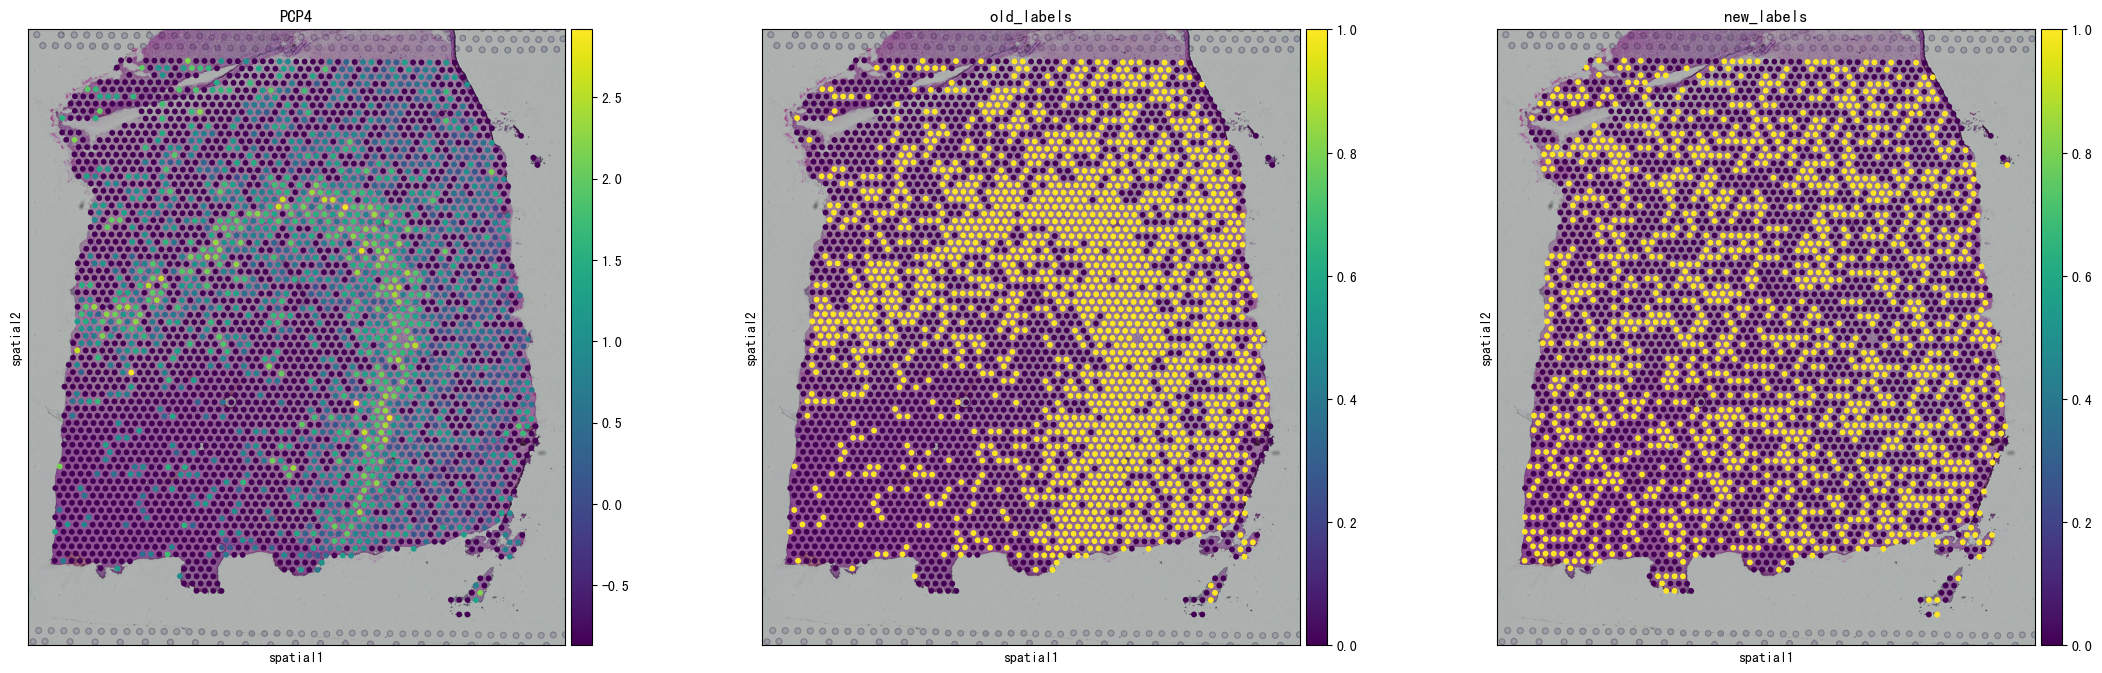

In [14]:
adata.obs['old_labels'] = gmm_labels
adata.obs['new_labels'] = labels_list
sc.pl.spatial(adata, color=[target_gene,'old_labels','new_labels'])